## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [21]:
# Mouse Meta Data
mouse_metadata.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [23]:
## Study Results Data
study_results.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [25]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results, on='Mouse ID',how='outer')

# Display the data table for preview

mouse_study_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [38]:
# Checking the number of mice.
mice_count = pd.DataFrame(mouse_study_df.groupby(['Mouse ID'])).shape[0]
print(f'The number of mice used in this study is {mice_count}')


The number of mice used in this study is 249


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate_ID = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]
mouse_duplicate_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
#
g989_data = mouse_study_df[mouse_study_df['Mouse ID']=='g989']
g989_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Given the discrepency in the data for the g989 mouse, this set has been dropped from the analyses due to competing values in tumour volume at specific time points
cleaned_mouse_study_data = mouse_study_df[mouse_study_df['Mouse ID']!='g989']
cleaned_mouse_study_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_count_new = pd.DataFrame(cleaned_mouse_study_data.groupby(['Mouse ID'])).shape[0]

print(f'The number of mice analysed in this study, after dropping g989 is {mice_count_new}')


The number of mice analysed in this study, after dropping g989 is 248


## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

variance = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdev = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Stdev': stdev,
    'SEM': sem
})

summary_statistics = summary_statistics.reset_index()
print(f'Summary Statistics for Tumour Volume per Drug')
summary_statistics


Summary Statistics for Tumour Volume per Drug


,Drug Regimen,Mean,Median,Variance,Stdev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

alternative_summary_statistics = cleaned_mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

alternative_summary_statistics = alternative_summary_statistics.reset_index()

print(f'Summary Statistics of Tumor Volumes treated by each drug')
alternative_summary_statistics


Summary Statistics of Tumor Volumes treated by each drug


,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

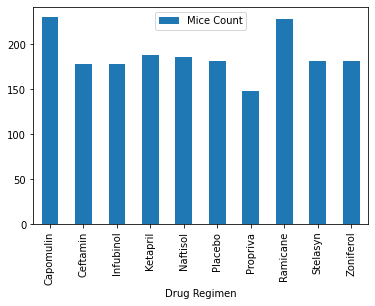

In [67]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_count = cleaned_mouse_study_data.groupby('Drug Regimen')['Mouse ID'].count()

mice_per_drug = pd.DataFrame(mice_count)
mice_per_drug = mice_per_drug.reset_index()

# Renaming the columns
mice_per_drug = mice_per_drug.rename(columns={'Mouse ID':'Mice Count'})

## Plotting a bar graph
mice_per_drug.plot.bar(x='Drug Regimen',y='Mice Count')

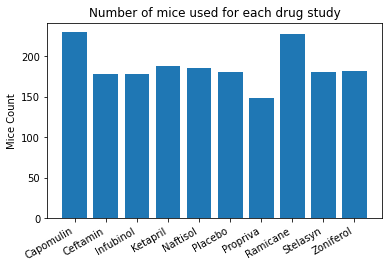

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_label = mice_per_drug['Drug Regimen']
y_label = mice_per_drug['Mice Count']

fig, ax1 = plt.subplots()
ax1.bar(x_label,y_label)
plt.ylabel('Mice Count')
plt.title('Number of mice used for each drug study')
fig.autofmt_xdate()



In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_mice = pd.DataFrame(cleaned_mouse_study_data[cleaned_mouse_study_data['Sex']=='Female'].groupby('Mouse ID')).shape[0]

male_mice = pd.DataFrame(cleaned_mouse_study_data[cleaned_mouse_study_data['Sex']=='Male'].groupby('Mouse ID')).shape[0]

male_female_mice = pd.merge(female_mice,male_mice)



TypeError: Can only merge Series or DataFrame objects, a <class 'int'> was passed

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [72]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [75]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
